In [1]:
colab = True

In [2]:
import os

In [3]:
if colab:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if colab:
  base_dir = '/content/drive/MyDrive/green_areas_detection'
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/yolov7" "./"
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/weigths" "./"
else:
  base_dir = ''

In [5]:
# IMPORTANT : from now on, we enter inside the `yolov7` folder
%cd yolov7

/content/yolov7


# LOAD AND PREPARE DATASET
We use $3$ images for the training : `19K35`, `19K38`, `18K11`.

We use $1$ image for the validation : `19K53`.  

We use $1$ image for the validation : `19K59`.  

We use only the 3 RGB channels.

In [6]:
from trees_detection_utils.dataset_handler import crop_images_and_bbs, save_bbs_as_txt, crop_images

In [7]:
CROP_SIZE = 640
STEP = 320

## Training images
We create the folder `train`, with two subfolders.
1. `train\images`, containing the crops.
2. `train\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [8]:
dataset_folder = os.path.join(base_dir, 'dataset_2011')

train_image_names_list = ['18K11', '19K38', '19K35']

train_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in train_image_names_list]

train_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in train_image_names_list]

In [9]:
crop_images_and_bbs(train_image_paths_list, train_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./train', infrared=False)

Processing image 18K11.tif


100%|██████████| 475/475 [00:04<00:00, 109.15it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.23, 3: 0.01, 4: 0.71, 6: 0.03, 9: 0.0}

Processing image 19K38.tif


100%|██████████| 475/475 [00:04<00:00, 108.60it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.22, 3: 0.01, 4: 0.71, 6: 0.03, 9: 0.0}

Processing image 19K35.tif


100%|██████████| 364/364 [00:03<00:00, 107.88it/s]

BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.22, 3: 0.01, 4: 0.69, 6: 0.04, 9: 0.0}



## Validation images
We create the folder `val`, with two subfolders.
1. `val\images`, containing the crops.
2. `val\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [10]:
dataset_folder = os.path.join(base_dir, 'dataset_2011')

val_image_names_list = ['19K53']

val_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in val_image_names_list]

val_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in val_image_names_list]

In [11]:
crop_images_and_bbs(val_image_paths_list, val_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./val', infrared=False)

Processing image 19K53.tif


100%|██████████| 446/446 [00:04<00:00, 106.07it/s]

BBs frequencies assignment {0: 0.02, 1: 0.03, 2: 0.27, 3: 0.0, 4: 0.67, 6: 0.02}



In [12]:
save_bbs_as_txt(val_bbs_shp_paths_list[0], val_image_paths_list[0], output_file_path=None)

## Test images
We create the folder `test`, with two subfolders.
1. `test\images`, containing the crops.
2. `test\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [13]:
dataset_folder = os.path.join(base_dir, 'dataset_2011')

test_image_names_list = ['19K59']

test_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in test_image_names_list]

test_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in test_image_names_list]

In [14]:

crop_images_and_bbs(test_image_paths_list, test_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./test', infrared=False)

Processing image 19K59.tif


100%|██████████| 475/475 [00:04<00:00, 107.71it/s]

BBs frequencies assignment {0: 0.02, 1: 0.02, 2: 0.25, 3: 0.01, 4: 0.63, 6: 0.07, 9: 0.0}



In [15]:
save_bbs_as_txt(test_bbs_shp_paths_list[0], test_image_paths_list[0], output_file_path=None)

# YOLO MODEL
https://github.com/WongKinYiu/yolov7

In [ ]:
# Just to check GPU
!nvidia-smi

Mon Oct 30 09:24:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd yolov7

[Errno 2] No such file or directory: 'yolov7'
/content/yolov7


In [ ]:
!pip install -r requirements.txt ;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


# Training
Train the model on the $3$ train images, with $1$ val image.

*(The starting point of this training is the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*


In [ ]:
# NEW
!python train.py --rgb_only --epochs 25 --workers 8 --device 0 --batch-size 8 --data 'data.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

*Remark : the printed scores (MAP; precision, recall, ...) are computed on the validation image. But pay attention that they are computed on the validation crops, not on whole full val image. In addition, pay attention that these scores are computed using particular confidence and iou_nms thresholds. So, you don't have to much high consideration on these scores.*

# Inference and evaluation on the full validation image

In [ ]:
%cd yolov7

[Errno 2] No such file or directory: 'yolov7'
/content/yolov7


In [19]:
from trees_detection_utils.inference import predict_on_img

### Inference
Perform inference on the whole validation image. The result of this is a single `.txt` file, containing all the bounding boxes on the whole validation image.

For now, we perform this inference by setting `conf_thres=0.25` and `iou_nms_thres=0.45`. These two very important inference parameters will be later tuned.

In [17]:
path_to_weigths = '../weigths/best_rgb_train_2011.pt'
image_path = os.path.join(base_dir, 'dataset_2011/19K53/19K53.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', crop_size=CROP_SIZE, step=STEP,
               conf_thres=0.25, iou_nms_thres=0.45, intersect_thres=0.75, verbose=True,
               save_fig_pred_bbs=True, infrared=False)

CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 101.23it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 475/475 [00:31<00:00, 15.07it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 465/465 [00:00<00:00, 10879.47it/s]
/content/yolov7/trees_detection_utils/inference.py:68: RuntimeWarning: invalid value encountered in divide
  intersect_ratios = np.where(rows_min_area_flag, inter/area1, inter/area2)


FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 4023/4023 [00:00<00:00, 60673.79it/s]


Image saved in ./full_figure.jpeg
FINISH SAVING IMAGE


### Evaluation
Evaluate these predicted bounding boxes w.r.t. the ground truth ones, still on the whole val image.

In [23]:
from trees_detection_utils.evaluation import visualize_errors_and_missings, evaluate_predicted_boxes

In [19]:
# Save a figure containing both the ground truths and predictes boxes, both with the
# missings and the errors
image_path = os.path.join(base_dir, 'dataset_2011/19K53/19K53.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset_2011/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path,
                              iou_eval_thres=0.4, show=False)

100%|██████████| 3830/3830 [00:00<00:00, 92378.64it/s]


Figure saved


4023it [00:31, 129.49it/s]


mAP: 0.60
Last precision: 0.66
Last recall: 0.69
Last f1: 0.67
Best f1: 0.68; index: 3605


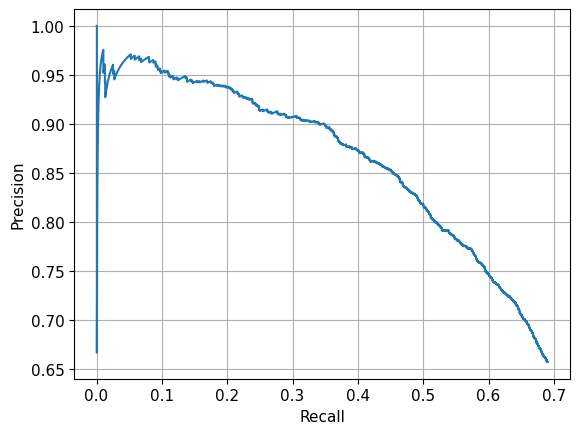

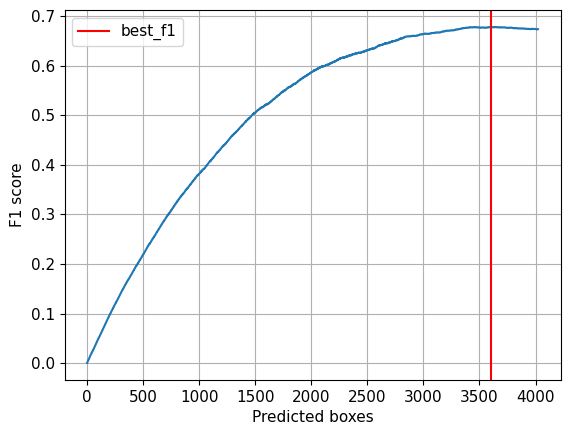

In [20]:
# NEW
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset_2011/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, plot_prec_rec=True, plot_f1=True, verbose=True)

Validation scores.
- F1 score : $0.68$.
- Precision : $0.66$.
- Recall : $0.69$.
- MAP : $0.60$.

# Hyperparameters tuning
Let's now tune the two inference parameters `conf_thres` and `iou_nms_thrss` on the validation image.

Exaustive grid search among all possible couples of values.

This tuning is done w.r.t. the f1 score. This is the measure to monitor.

In [21]:
from trees_detection_utils.evaluation import inference_parameters_tuning

[(0.1, 0.3), (0.1, 0.45), (0.1, 0.6), (0.15, 0.3), (0.15, 0.45), (0.15, 0.6), (0.2, 0.3), (0.2, 0.45), (0.2, 0.6), (0.25, 0.3), (0.25, 0.45), (0.25, 0.6), (0.3, 0.3), (0.3, 0.45), (0.3, 0.6), (0.35, 0.3), (0.35, 0.45), (0.35, 0.6), (0.4, 0.3), (0.4, 0.45), (0.4, 0.6), (0.45, 0.3), (0.45, 0.45), (0.45, 0.6), (0.5, 0.3), (0.5, 0.45), (0.5, 0.6)]
START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.45it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:36<00:00, 13.19it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 7972.00it/s]


FINISH UNIFY CROPS



6482it [00:51, 126.74it/s]


mAP: 0.65
Last precision: 0.46
Last recall: 0.78
Last f1: 0.58
Best f1: 0.68; index: 3560
mAP:0.647197483364988 f1:0.5762218774243599 prec:0.45834618944770134 rec:0.7757180156657963
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.07it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:37<00:00, 12.78it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 7115.25it/s]


FINISH UNIFY CROPS



6436it [00:50, 128.08it/s]


mAP: 0.65
Last precision: 0.46
Last recall: 0.77
Last f1: 0.58
Best f1: 0.67; index: 3450
mAP:0.6457542792038186 f1:0.5760763685953634 prec:0.4594468614045991 rec:0.7720626631853786
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.40it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:40<00:00, 11.86it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 1659.73it/s]


FINISH UNIFY CROPS



6315it [00:49, 127.39it/s]


mAP: 0.63
Last precision: 0.46
Last recall: 0.76
Last f1: 0.57
Best f1: 0.65; index: 3181
mAP:0.6317484286021265 f1:0.5736816165598818 prec:0.46080760095011875 rec:0.7597911227154047
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 99.29it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:34<00:00, 13.95it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 8394.51it/s]


FINISH UNIFY CROPS



5421it [00:42, 128.34it/s]


mAP: 0.64
Last precision: 0.53
Last recall: 0.76
Last f1: 0.63
Best f1: 0.68; index: 3627
mAP:0.6370105748798611 f1:0.6254458977407849 prec:0.5336653753919941 rec:0.7553524804177546
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 99.28it/s] 


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:34<00:00, 13.81it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 8694.27it/s]


FINISH UNIFY CROPS



5407it [00:42, 127.97it/s]


mAP: 0.64
Last precision: 0.53
Last recall: 0.76
Last f1: 0.63
Best f1: 0.68; index: 3578
mAP:0.6393313722486523 f1:0.6261773303020461 prec:0.5348622156463844 rec:0.7550913838120105
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 101.63it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:35<00:00, 13.30it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 472/472 [00:00<00:00, 8143.78it/s]


FINISH UNIFY CROPS



5323it [00:40, 129.85it/s]


mAP: 0.64
Last precision: 0.54
Last recall: 0.75
Last f1: 0.63
Best f1: 0.67; index: 3418
mAP:0.635681718486265 f1:0.6268982847153939 prec:0.5389817771933121 rec:0.7490861618798955
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 101.99it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:32<00:00, 14.74it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 469/469 [00:00<00:00, 10018.79it/s]


FINISH UNIFY CROPS



4614it [00:36, 127.86it/s]


mAP: 0.62
Last precision: 0.60
Last recall: 0.72
Last f1: 0.65
Best f1: 0.68; index: 3600
mAP:0.6177724600224264 f1:0.6549028896257698 prec:0.5992631122670135 rec:0.7219321148825065
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 101.73it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:32<00:00, 14.47it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 469/469 [00:00<00:00, 9616.86it/s]


FINISH UNIFY CROPS



4626it [00:35, 129.50it/s]


mAP: 0.62
Last precision: 0.60
Last recall: 0.72
Last f1: 0.66
Best f1: 0.68; index: 3616
mAP:0.621828424797725 f1:0.6558656575212866 prec:0.5994379593601383 rec:0.7240208877284595
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 102.83it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:33<00:00, 14.29it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 469/469 [00:00<00:00, 8724.61it/s]


FINISH UNIFY CROPS



4567it [00:36, 125.41it/s]


mAP: 0.62
Last precision: 0.60
Last recall: 0.72
Last f1: 0.66
Best f1: 0.68; index: 3567
mAP:0.6222391323011452 f1:0.6576158151720853 prec:0.604554412086709 rec:0.72088772845953
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 101.30it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:30<00:00, 15.37it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 465/465 [00:00<00:00, 11932.18it/s]


FINISH UNIFY CROPS



4013it [00:31, 127.51it/s]


mAP: 0.60
Last precision: 0.66
Last recall: 0.69
Last f1: 0.67
Best f1: 0.68; index: 3609
mAP:0.5957683911971284 f1:0.6719367588932806 prec:0.656615998006479 rec:0.6879895561357703
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 102.38it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:30<00:00, 15.51it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 465/465 [00:00<00:00, 10824.70it/s]


FINISH UNIFY CROPS



4023it [00:30, 130.14it/s]


mAP: 0.60
Last precision: 0.66
Last recall: 0.69
Last f1: 0.67
Best f1: 0.68; index: 3605
mAP:0.5998109815634436 f1:0.6733732331593022 prec:0.6572209793686303 rec:0.6903394255874674
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 105.08it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:30<00:00, 15.42it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 465/465 [00:00<00:00, 11123.13it/s]


FINISH UNIFY CROPS



3992it [00:31, 127.67it/s]


mAP: 0.60
Last precision: 0.66
Last recall: 0.69
Last f1: 0.68
Best f1: 0.68; index: 3666
mAP:0.6034380273361121 f1:0.6760419330094605 prec:0.6623246492985972 rec:0.6903394255874674
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 106.85it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:29<00:00, 16.25it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 462/462 [00:00<00:00, 11954.08it/s]


FINISH UNIFY CROPS



3520it [00:27, 125.77it/s]


mAP: 0.57
Last precision: 0.71
Last recall: 0.65
Last f1: 0.68
Best f1: 0.68; index: 3432
mAP:0.5685175258453571 f1:0.675374149659864 prec:0.7051136363636363 rec:0.6480417754569191
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.86it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:29<00:00, 16.01it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 462/462 [00:00<00:00, 12216.50it/s]


FINISH UNIFY CROPS



3527it [00:27, 130.28it/s]


mAP: 0.57
Last precision: 0.71
Last recall: 0.65
Last f1: 0.68
Best f1: 0.68; index: 3479
mAP:0.5721903452164107 f1:0.6769063476960718 prec:0.7059824213212362 rec:0.6501305483028721
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 104.48it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:29<00:00, 15.94it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 462/462 [00:00<00:00, 11800.19it/s]


FINISH UNIFY CROPS



3503it [00:26, 131.62it/s]


mAP: 0.58
Last precision: 0.71
Last recall: 0.65
Last f1: 0.68
Best f1: 0.68; index: 3450
mAP:0.5756023832000644 f1:0.6788490385926633 prec:0.7105338281473023 rec:0.649869451697128
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 105.48it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:28<00:00, 16.76it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 458/458 [00:00<00:00, 13092.73it/s]


FINISH UNIFY CROPS



3076it [00:23, 130.89it/s]


mAP: 0.53
Last precision: 0.75
Last recall: 0.60
Last f1: 0.66
Best f1: 0.66; index: 3037
mAP:0.532477658964862 f1:0.6640602374746598 prec:0.7454486345903771 rec:0.5986945169712794
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 107.53it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:28<00:00, 16.84it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 458/458 [00:00<00:00, 13551.68it/s]


FINISH UNIFY CROPS



3083it [00:23, 130.89it/s]


mAP: 0.54
Last precision: 0.75
Last recall: 0.60
Last f1: 0.66
Best f1: 0.66; index: 3081
mAP:0.5353987072799506 f1:0.664545060031824 prec:0.7450535192993837 rec:0.5997389033942558
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 106.28it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:28<00:00, 16.52it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 458/458 [00:00<00:00, 13577.92it/s]


FINISH UNIFY CROPS



3066it [00:23, 130.07it/s]


mAP: 0.54
Last precision: 0.75
Last recall: 0.60
Last f1: 0.67
Best f1: 0.67; index: 3065
mAP:0.5389247698257915 f1:0.6664733178654292 prec:0.7495107632093934 rec:0.6
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 104.79it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:27<00:00, 17.15it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 455/455 [00:00<00:00, 14016.13it/s]


FINISH UNIFY CROPS



2677it [00:20, 130.12it/s]


mAP: 0.49
Last precision: 0.78
Last recall: 0.55
Last f1: 0.64
Best f1: 0.64; index: 2676
mAP:0.49216777912239695 f1:0.6429998463193484 prec:0.7814717967874486 rec:0.5462140992167102
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 102.48it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:27<00:00, 17.41it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 455/455 [00:00<00:00, 14764.45it/s]


FINISH UNIFY CROPS



2678it [00:20, 129.64it/s]


mAP: 0.50
Last precision: 0.78
Last recall: 0.55
Last f1: 0.64
Best f1: 0.64; index: 2677
mAP:0.4955501735058672 f1:0.6447449293177628 prec:0.7834204630321135 rec:0.547780678851175
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 105.01it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:27<00:00, 17.13it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 455/455 [00:00<00:00, 13578.05it/s]


FINISH UNIFY CROPS



2664it [00:20, 129.79it/s]


mAP: 0.50
Last precision: 0.79
Last recall: 0.55
Last f1: 0.65
Best f1: 0.65; index: 2663
mAP:0.4992093924413471 f1:0.6467508469356329 prec:0.7882882882882883 rec:0.5483028720626631
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 105.47it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:26<00:00, 17.65it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 450/450 [00:00<00:00, 16887.25it/s]


FINISH UNIFY CROPS



2271it [00:17, 129.45it/s]


mAP: 0.45
Last precision: 0.82
Last recall: 0.49
Last f1: 0.61
Best f1: 0.61; index: 2269
mAP:0.4461720634059156 f1:0.6136698901819374 prec:0.8243064729194187 rec:0.48877284595300263
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.50it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:26<00:00, 17.63it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 450/450 [00:00<00:00, 16423.92it/s]


FINISH UNIFY CROPS



2271it [00:17, 127.93it/s]


mAP: 0.45
Last precision: 0.83
Last recall: 0.49
Last f1: 0.62
Best f1: 0.62; index: 2270
mAP:0.4492892090759397 f1:0.6153089657433207 prec:0.8265081461911052 rec:0.4900783289817232
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 103.38it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:27<00:00, 17.55it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 450/450 [00:00<00:00, 15838.32it/s]


FINISH UNIFY CROPS



2262it [00:17, 128.68it/s]


mAP: 0.45
Last precision: 0.83
Last recall: 0.49
Last f1: 0.62
Best f1: 0.62; index: 2261
mAP:0.4519603687101715 f1:0.6168745896257386 prec:0.8306808134394341 rec:0.4906005221932115
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 106.72it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:26<00:00, 18.10it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 447/447 [00:00<00:00, 16220.70it/s]


FINISH UNIFY CROPS



1931it [00:15, 128.64it/s]


mAP: 0.40
Last precision: 0.86
Last recall: 0.43
Last f1: 0.57
Best f1: 0.57; index: 1930
mAP:0.3977251930145402 f1:0.5735115431348724 prec:0.8555152770585189 rec:0.43133159268929505
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 102.99it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:26<00:00, 17.99it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 447/447 [00:00<00:00, 17941.01it/s]


FINISH UNIFY CROPS



1932it [00:14, 129.75it/s]


mAP: 0.40
Last precision: 0.86
Last recall: 0.43
Last f1: 0.58
Best f1: 0.58; index: 1931
mAP:0.4009649121679861 f1:0.5754946199236376 prec:0.8581780538302277 rec:0.43289817232375977
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 106.33it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 475/475 [00:26<00:00, 17.98it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 447/447 [00:00<00:00, 16280.71it/s]


FINISH UNIFY CROPS



1927it [00:14, 131.06it/s]


mAP: 0.40
Last precision: 0.86
Last recall: 0.43
Last f1: 0.58
Best f1: 0.58; index: 1926
mAP:0.4043509913648712 f1:0.577731457356262 prec:0.8629994810586403 rec:0.4342036553524804
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6

BEST HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6
mAP:0.5756023832000644 f1:0.6788490385926633 prec:0.7105338281473023 rec:0.649869451697128


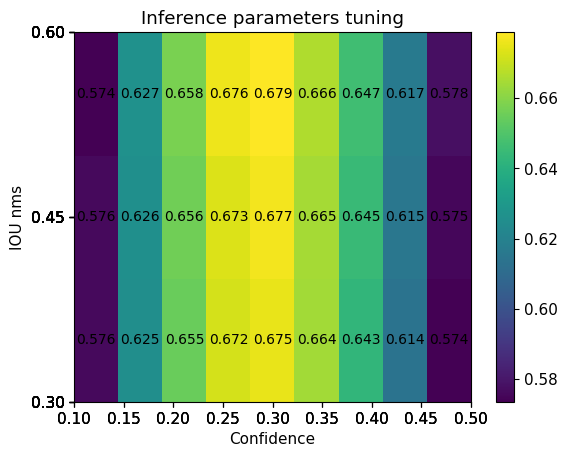

In [23]:
%matplotlib inline
path_to_weigths = '../weigths/best_rgb_train_2011.pt'
image_path = os.path.join(base_dir, 'dataset_2011/19K53/19K53.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset_2011/19K53/19K53_boxes.txt')
conf_thres_list = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
iou_nms_thres_list = [0.3, 0.45, 0.6]
hyperparameters_list, hyperparameters_metrics_dict = inference_parameters_tuning(path_to_weigths, image_path, gt_boxes_txt_path, conf_thres_list, iou_nms_thres_list,
                                                           infrared=False, crop_size=CROP_SIZE, step=STEP, preferred_metric='f1',
                                                           iou_eval_thres=0.4, plot=True)

Results of the tuning.
- Best values : `best_conf=0.30` and `best_iou_nms=0.60`.
- F1 score : $0.68$.
- Precision : $0.71$ ; Recall : $0.65$.
- MAP : $0.58$.

In [16]:
best_conf = 0.30
best_iou_nms = 0.60

# Test
Let's now perform a training on the train + validation : we call this **full training**. This is our final model. *(The starting point of this training is still the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*

We then test this final model on the test image. The inference is run using the bets inference parameters found before with the tuning.

### Full training

In [17]:
%mkdir full_train
%cp -r train/images full_train/
%cp -r train/labels full_train/
%cp -r val/images full_train/
%cp -r val/labels full_train/

In [ ]:
# NEW
!python train.py --rgb_only --epochs 30 --workers 8 --device 0 --batch-size 8 --data 'data_fulltrain.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

2023-10-30 11:49:45.894290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 11:49:45.894354: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 11:49:45.894383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 11:49:45.902066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 11:49:46.858946: W tensorflow/c

### Inference

In [20]:
path_to_weigths = '../weigths/best_rgb_fulltrain_2011.pt'
image_path = os.path.join(base_dir, 'dataset_2011/19K59/19K59.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', infrared=False, crop_size=CROP_SIZE, step=STEP,
                   conf_thres=best_conf, iou_nms_thres=best_iou_nms, intersect_thres=0.75, verbose=True, save_fig_pred_bbs=True)

CROP IMAGE ...


100%|██████████| 475/475 [00:04<00:00, 109.39it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 475/475 [00:34<00:00, 13.58it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 475/475 [00:00<00:00, 7991.55it/s]


FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 6845/6845 [00:00<00:00, 64407.17it/s]


Image saved in ./full_figure.jpeg
FINISH SAVING IMAGE


### Evaluation

In [25]:
image_path = os.path.join(base_dir, 'dataset_2011/19K59/19K59.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset_2011/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, show=False)

100%|██████████| 6202/6202 [00:00<00:00, 119532.74it/s]


Figure saved


6845it [01:21, 84.22it/s]


mAP: 0.63
Last precision: 0.66
Last recall: 0.73
Last f1: 0.69
Best f1: 0.70; index: 6403


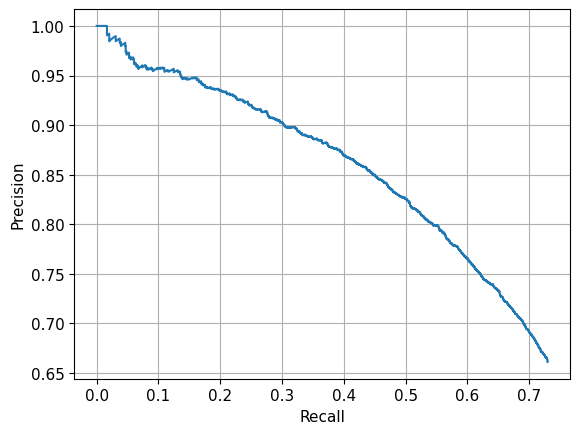

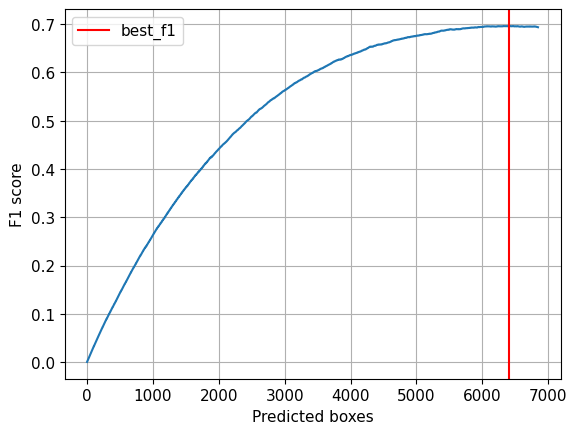

In [26]:
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset_2011/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path,
                                                                   iou_eval_thres=0.4,
                                                                   plot_prec_rec=True, plot_f1=True, verbose=True)

Final test scores.
- F1 score : $0.7$.
- Precision : $0.66$.
- Recall : $0.73$.
- MAP : $0.63$.